<a href="https://colab.research.google.com/github/pythience/Integrador/blob/master/TPFinal_AUSA_SeriesTiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Science 2019 - Digital House #Data
##Trabajo Integrador
![](https://www.ausa.com.ar/wp-content/themes/ausa/images/logo-ausa-negro.png)
##Seguridad Vial Autopistas Ausa 
###Introducción
####Información de hechos que requirieron atención por parte de Seguridad de Vial de AUSA.

El dataset consiste en vectores de características que pertenecen a 5700+ incidentes o hechos que requirieron atención por parte de Seguridad de Vial de AUSA. 

El conjunto de datos se conforma de manera que cada registro pertenezca a un hecho diferente. Cada hecho se registra con fecha y hora, vía dónde ocurre, condiciones climáticas y vehículos involucrados.

El conjunto de datos original consta de 1 atributo de fechas, 8 atributos numéricos y 6 atributos categóricos. El atributo 'lesionados' o 'fallecidos' se utiliza como etiqueta de clasificación.

####Descripción de las columnas:
**Fecha:** Fecha del hecho.

**Autopista:** En cuál de las autopistas que administra AUSA se produjo el hecho. (También se informan zonas importantes como el distribuidor de 9 de julio y la zona de transición entre la AU1 y las AU6).
**Localización:** Detalle que da más precisión del lugar donde se produjo el hecho dentro de la autopista.
**Punto Kilométrico:** Lugar del hecho contado desde el kilometro 0 de cada autopista.

**Tipo Evento:** Categorización del hecho:
*   **Accidente:** acontecimiento inesperado, no planeado, que implica una alteración en el estado normal de las personas, elementos o funciones, con repercusiones negativas,con potencial para causar lesiones o muerte en las personas y daños o perjuicios a bienes de los actores involucrados o de terceros.
*   **Incidente:** materialización de un riesgo en un suceso concreto de escasa o nula
repercusión dañina, que puede ocasionar una reducción temporaria de la calzada o un
incremento anormal de la demanda, que afecta la seguridad vial y que puede
desencadenar en un accidente.

**Tipo de siniestro:** son descripciones acotadas o categorizadas del hecho de tránsito.

**Tipos de Vehículos:** es la clasificación por tipología de vehículos involucrados.
*   Camiones (incluye FURGON GRANDE, GRUAS).
*   Autos (incluye: TAXI, PIC UP, CAMIONETA, FURGON CHICO).
*   Motos
*   Ómnibus (Incluye: AUTOBUS y MINIBUS).

**Clima:** Estado del Clima en el momento del hecho (seleccionado manualmente).

**Estado Pavimento:** Estado del pavimento en el momento del hecho (seleccionado
manualmente).

**Fallecidos y Heridos:** Numero de involucrados en los accidentes según su estado de gravedad.



---


###  Series de tiempo

El análisis de series de tiempo se suele utilizar para proyectar o pronosticar la evolución de una variable a lo largo del tiempo, a partir de información previa sobre esa misma variable. 

#### 1) Análisis exploratorio y preprocessing

El dataset nos provee:
*   tres columnas sobre la ubicación donde se produce el incidente. 
*   tres columnas relacionadas a la fecha del incidente. (donde detectamos una inconsistencia de origen en el formato de la fecha, y para lo cual el dataset incluye una columna adicional que permite corregirlo).
*   dos columnas sobre las condiciones ambientales al momento del incidente.
*   cinco columnas sobre el tipo de incidente y los vehículos involucrados.
*   dos columnas sobre el estado y cantidad de personas involucradas.


*Otras características:*
La función "Día especial" indica la proximidad del tiempo de visita del sitio a un día especial específico (por ejemplo, el Día de la Madre, el Día de San Valentín) en el que es más probable que las sesiones finalicen con la compra. El valor de este atributo se determina considerando la dinámica del comercio electrónico, como la duración entre la fecha del pedido y la fecha de entrega. Por ejemplo, para el día de San Valentín, este valor toma un valor distinto de cero entre el 2 de febrero y el 12 de febrero, cero antes y después de esta fecha a menos que esté cerca de otro día especial, y su valor máximo de 1 el 8 de febrero. El conjunto de datos también incluye sistema operativo, navegador, región, tipo de tráfico, tipo de visitante como visitante recurrente o nuevo, un valor booleano que indica si la fecha de la visita es el fin de semana y el mes del año.

*Fuente: https://data.buenosaires.gob.ar/dataset/seguridad-vial-autopistas-ausa/archivo/187.2*


---



In [0]:
# para Colab, excluir para Anaconda
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# para Anaconda:
path = ''

# para Colab, CB:
path = 'gdrive/My Drive/DataScience - DH/Trabajo_Integrador/AUSA/BA DATA/'

In [0]:
#import os
import pickle

In [0]:
with open('{}intervenciones-de-seguridad-vial.pkl'.format(path), 'rb') as f_df:
    df = pickle.load(f_df)
    
df.shape

(5785, 17)

In [0]:
df.sample(5)

,periodo,fecha_hora,dia_semana,hora,autopista,banda_y_o_ramal,pk,condiciones_meteorologicas,superficie_de_la_via,lesionados,fallecidos,tipo_de_siniestro,moto,liviano,bus,camion,fecha
4957,201805,2018-05-28 08:00:00,Monday,8,AU_25_DE_MAYO,ASCENDENTE,2500,BUENO,SECA,0,0,OBSTACULO_NO_FIJO,1,0,1,0,2018-05-28
1387,201503,2015-03-23 15:00:00,Monday,15,AU_PERITO_MORENO,TRANSICION_RAMAL_3,RAMAL ENLACE,BUENO,SECA,0,0,COLISION_CON_DOS_O_MAS_VEHICULOS,1,1,0,0,2015-03-23
3248,201611,2016-11-02 11:00:00,Wednesday,11,AU_DELLEPIANE,ASCENDENTE,2600,BUENO,SECA,1,0,COLISION_CON_DOS_O_MAS_VEHICULOS,0,2,0,0,2016-02-11
3690,201703,2017-03-21 14:00:00,Tuesday,14,AU_25_DE_MAYO,ASCENDENTE,2600,BUENO,SECA,1,0,COLISION_CON_DOS_O_MAS_VEHICULOS,1,1,0,0,2017-03-21
2994,201608,2016-08-11 23:00:00,Thursday,23,AU_FRONDIZI,ASCENDENTE,2200,BUENO,SECA,6,0,COLISION_CON_DOS_O_MAS_VEHICULOS,0,4,0,0,2016-11-08


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
#!pip install statsmodels
#!pip install scipy==1.2 --upgrade

In [0]:
#import math

In [0]:


## Import statsmodel
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
#from statsmodels.tsa.stattools import adfuller

In [0]:
#df = pd.read_csv('{}cebolla_india.csv'.format(path))
#df.shape

In [0]:
df.tail()

,periodo,fecha_hora,dia_semana,hora,autopista,banda_y_o_ramal,pk,condiciones_meteorologicas,superficie_de_la_via,lesionados,fallecidos,tipo_de_siniestro,moto,liviano,bus,camion,fecha
5780,201904,2019-04-29 18:00:00,Monday,18,AU_PERITO_MORENO,DESCENDENTE,2600,BUENO,SECA,1,0,SINIESTRO_DE_UN_SOLO_VEHICULO___SIN_COLISION,1,0,0,0,2019-04-29
5781,201904,2019-04-30 10:00:00,Tuesday,10,AU_FRONDIZI,ASCENDENTE,1800,BUENO,SECA,2,0,COLISION_CON_DOS_O_MAS_VEHICULOS,1,2,0,0,2019-04-30
5782,201904,2019-04-30 10:00:00,Tuesday,10,AU_FRONDIZI,ASCENDENTE,1800,BUENO,SECA,0,0,COLISION_CON_DOS_O_MAS_VEHICULOS,0,2,0,0,2019-04-30
5783,201904,2019-04-30 17:00:00,Tuesday,17,AU_PERITO_MORENO,DESCENDENTE,5800,BUENO,SECA,0,0,COLISION_CON_DOS_O_MAS_VEHICULOS,0,1,0,0,2019-04-30
5784,201904,2019-04-30 21:00:00,Tuesday,21,AV_CANTILO,ASCENDENTE,8300,BUENO,SECA,0,0,COLISION_CON_DOS_O_MAS_VEHICULOS,0,2,0,0,2019-04-30


In [0]:
df.dtypes

periodo                             category
fecha_hora                    datetime64[ns]
dia_semana                          category
hora                                category
autopista                             object
banda_y_o_ramal                       object
pk                                    object
condiciones_meteorologicas            object
superficie_de_la_via                  object
lesionados                             int64
fallecidos                             int64
tipo_de_siniestro                     object
moto                                   int64
liviano                                int64
bus                                    int64
camion                                 int64
fecha                                 object
dtype: object

In [0]:
# Cambiamos el formado de la columna 'fecha_hora'
df.fecha_hora = pd.DatetimeIndex(df.fecha_hora)
print(df['fecha_hora'].dtype)
#df.set_index(df['fecha_hora'], inplace=True)
df.index.name = 'id'
df.set_index('id', inplace=True)
print(df.index)
# Es equivalente a datetime64

datetime64[ns]


KeyError: ignored

In [0]:
df.tail()

In [0]:
# Podemos reindexar nuestro dataframe 
df = df.sort_values(by = "fecha_hora")
#df.index = pd.PeriodIndex(df.fecha_hora, freq='H')
#df.set_index('id', inplace=True)
df.head()


In [0]:
fig, ax = plt.subplots(figsize=(20,12))
g = sns.pointplot(x=df.fecha_hora, y=df.lesionados, groupby=df.fecha_hora.dt.dayofweek, hue=df.fecha_hora.dt.year, ax=ax)
g.set(xlabel = 'Días de semana\n ← 2014       2019  →', ylabel = 'Cantidad de Lesionados')


In [0]:
len(pd.unique(df.periodo)), pd.unique(df.periodo)

In [0]:
len(pd.unique(df.autopista)), pd.unique(df.autopista)

El precio en cada una de estas ciudades conforma una serie de tiempo. Vamos a ver cuál de estas ciudades tuvo mayor volumen de ventas y vamos a recortar nuestro análisis a esa ciudad.

In [0]:
df.groupby(['dia_semana', 'hora'])['lesionados'].sum().sort_values(ascending=False).head()



---



---



para graficar series de tiempos tendremos que agrupar y agregar por autopista y sentido, entre otros...

In [0]:
df5 = df.groupby(by=['fecha_hora', 'autopista','banda_y_o_ramal'], level=0).count()
df5

In [0]:
df3=df[:].groupby(['fecha_hora', 'autopista','banda_y_o_ramal']).sum().sort_values('lesionados', ascending=False)
df3


In [0]:

d = {'fecha_hora':'intervenciones', 'lesionados':'lesionados','fallecidos':'fallecidos'}
df4=df.groupby(['fecha_hora', 'autopista','banda_y_o_ramal']) \
    .agg({'fecha_hora':'count','lesionados':'sum', 'fallecidos':'sum'}) \
    .rename(columns=d).sort_values('intervenciones', ascending=False)
#df4['year'] = df4.fecha_hora.dt.year
#df4['dia_hora'] = str(df4.fecha_hora.dt.dayofweek) + '_' + str(df4.fecha_hora.dt.hour)
#df4.reset_index(inplace=True)

display(df4.shape)
display(df4.head(20))

In [0]:
df4.index

In [0]:
ax = sns.pointplot(x=df4.index[:0], y=df4.intervenciones.mean(), groupby=('autopista','banda_y_o_ramal') ,data=df4, markers='None')
_ =ax.get_xaxis().set_ticks([])

# TODO: consultar cómo graficar

In [0]:
df2=df.groupby(['autopista', 'banda_y_o_ramal'])['fecha_hora'].count().reset_index(name="count")
df2

Grafiquemos ahora el precio mínimo, el máximo y la moda para cada mes. 

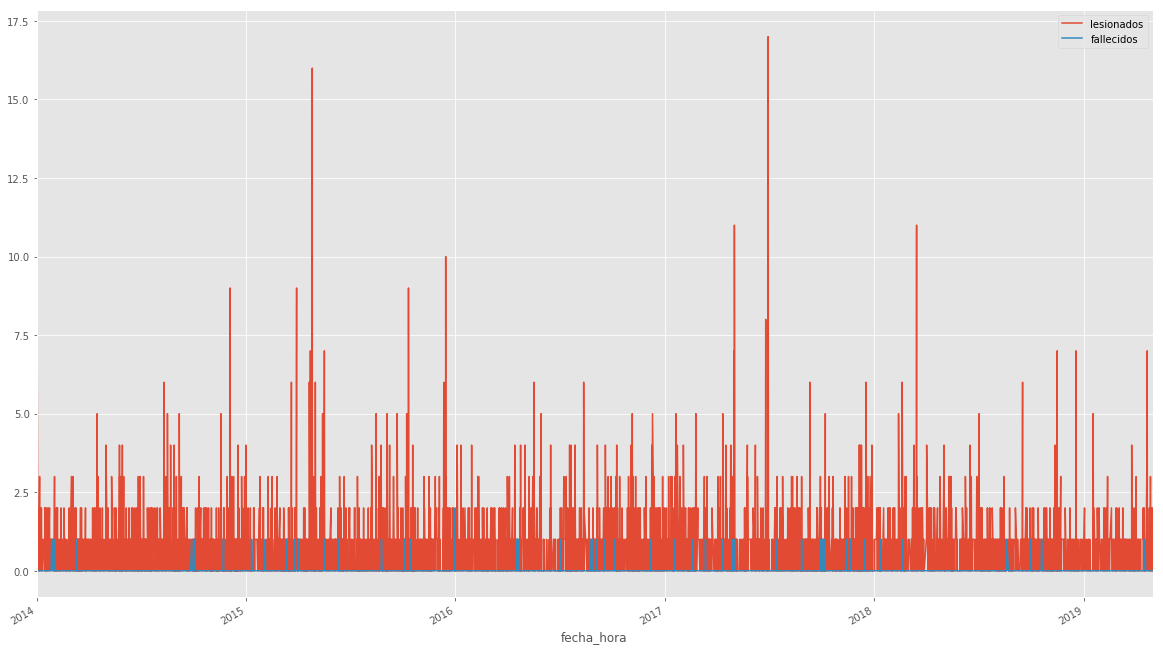

In [0]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 12)
df.plot(x='fecha_hora', kind = "line", y = ['lesionados', 'fallecidos']);

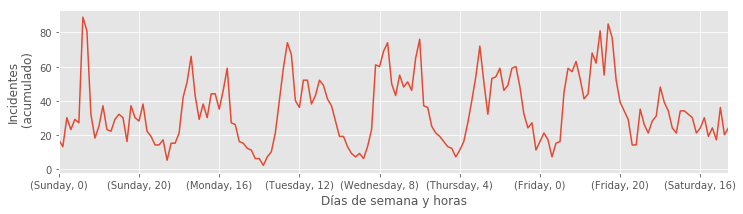

In [0]:
df.groupby(['dia_semana', 'hora']).fecha_hora.agg('count').plot(figsize=(12,3))
plt.ylabel('Incidentes\n (acumulado)')
plt.xlabel('Días de semana y horas');


In [0]:
df_incidentes_dia_hora = pd.DataFrame(df.groupby([df.fecha_hora.dt.year, 'dia_semana', 'hora']).fecha_hora.agg('count'))
display(df_incidentes_dia_hora.shape)
display(df_incidentes_dia_hora.sample(5))


(939, 1)

,,,fecha_hora
fecha_hora,dia_semana,hora,
2014,Friday,14,6
2018,Tuesday,8,10
2019,Tuesday,17,3
2016,Wednesday,9,13
2018,Thursday,1,3


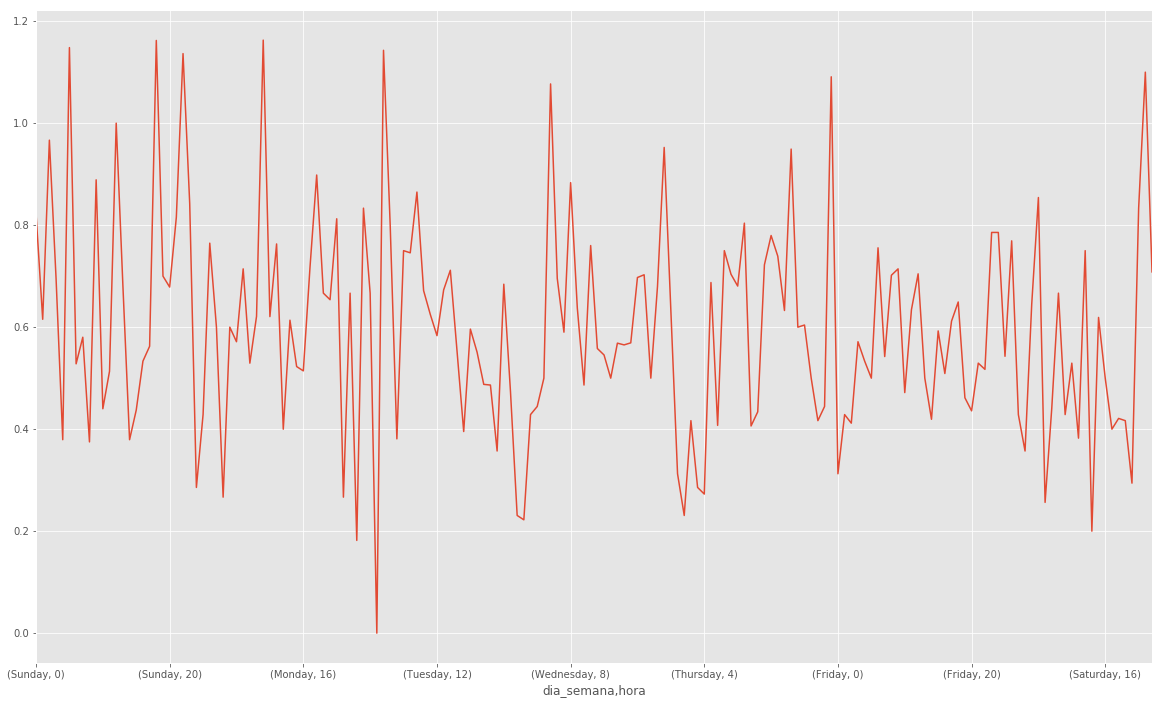

In [0]:
df.groupby(['dia_semana', 'hora']).lesionados.agg('mean').plot(figsize=(20,12))

(-0.5, 30)

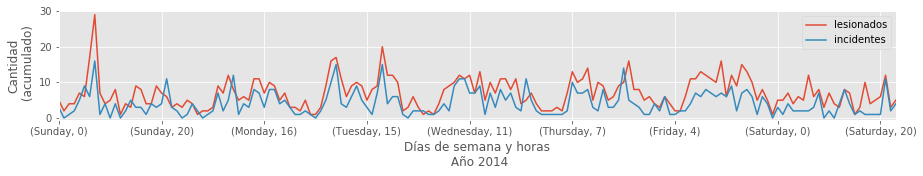

In [0]:
df[df.fecha_hora.dt.year == 2014].groupby([ 'dia_semana', 'hora']).fecha_hora.agg('count').plot(figsize=(15,2))
df[df.fecha_hora.dt.year == 2014].groupby([ 'dia_semana', 'hora']).lesionados.agg('sum').plot(figsize=(15,2))

#plt.plot(<X AXIS VALUES HERE>, <Y AXIS VALUES HERE>, 'line type', label='label here')
#plt.plot(<X AXIS VALUES HERE>, <Y AXIS VALUES HERE>, 'line type', label='label here')
plt.legend(loc='best', labels={'lesionados','incidentes'})
plt.ylabel('Cantidad\n (acumulado)')
plt.xlabel('Días de semana y horas\n Año 2014');
plt.ylim(-0.5, 30)
#plt.show()

(-0.5, 30)

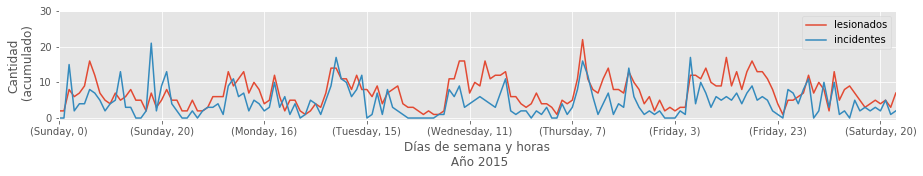

In [0]:
df[df.fecha_hora.dt.year == 2015].groupby([ 'dia_semana', 'hora']).fecha_hora.agg('count').plot(figsize=(15,2))
df[df.fecha_hora.dt.year == 2015].groupby([ 'dia_semana', 'hora']).lesionados.agg('sum').plot(figsize=(15,2))

#plt.plot(<X AXIS VALUES HERE>, <Y AXIS VALUES HERE>, 'line type', label='label here')
#plt.plot(<X AXIS VALUES HERE>, <Y AXIS VALUES HERE>, 'line type', label='label here')
plt.legend(loc='best', labels={'lesionados','incidentes'})
plt.ylabel('Cantidad\n (acumulado)')
plt.xlabel('Días de semana y horas\n Año 2015');
plt.ylim(-0.5, 30)

#plt.show()

(-0.5, 30)

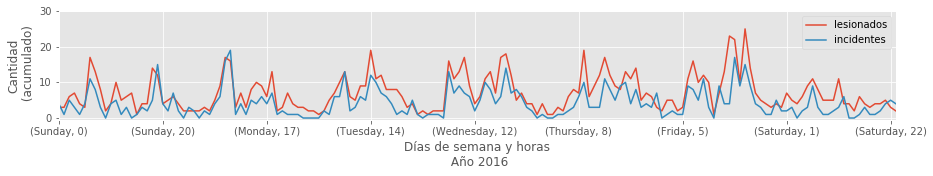

In [0]:
df[df.fecha_hora.dt.year == 2016].groupby(['dia_semana', 'hora']).fecha_hora.agg('count').plot(figsize=(15,2))
df[df.fecha_hora.dt.year == 2016].groupby([ 'dia_semana', 'hora']).lesionados.agg('sum').plot(figsize=(15,2))

#plt.plot(<X AXIS VALUES HERE>, <Y AXIS VALUES HERE>, 'line type', label='label here')
#plt.plot(<X AXIS VALUES HERE>, <Y AXIS VALUES HERE>, 'line type', label='label here')
plt.legend(loc='best', labels={'lesionados','incidentes'})
plt.ylabel('Cantidad\n (acumulado)')
plt.xlabel('Días de semana y horas\n Año 2016');
plt.ylim(-0.5, 30)

#plt.show()

(-0.5, 30)

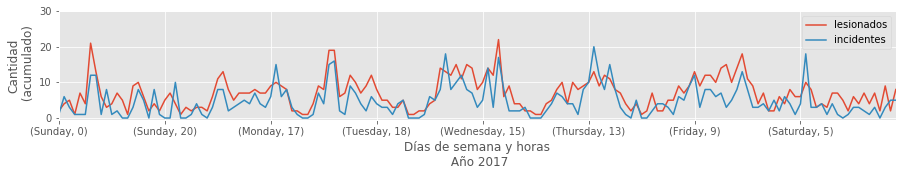

In [0]:
df[df.fecha_hora.dt.year == 2017].groupby([ 'dia_semana', 'hora']).fecha_hora.agg('count').plot(figsize=(15,2))
df[df.fecha_hora.dt.year == 2017].groupby(['dia_semana', 'hora']).lesionados.agg('sum').plot(figsize=(15,2))

#plt.plot(<X AXIS VALUES HERE>, <Y AXIS VALUES HERE>, 'line type', label='label here')
#plt.plot(<X AXIS VALUES HERE>, <Y AXIS VALUES HERE>, 'line type', label='label here')
plt.legend(loc='best', labels={'lesionados','incidentes'})
plt.ylabel('Cantidad\n (acumulado)')
plt.xlabel('Días de semana y horas\n Año 2017');
plt.ylim(-0.5, 30)

#plt.show()

(-0.5, 30)

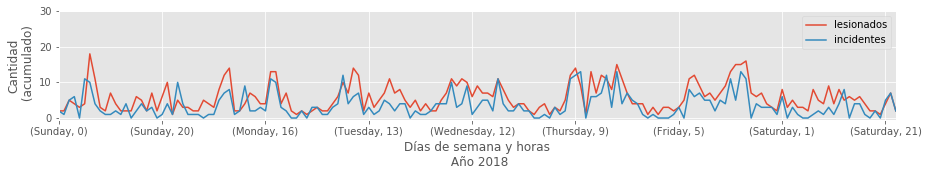

In [0]:
df[df.fecha_hora.dt.year == 2018].groupby([ 'dia_semana', 'hora']).fecha_hora.agg('count').plot(figsize=(15,2))
df[df.fecha_hora.dt.year == 2018].groupby([ 'dia_semana', 'hora']).lesionados.agg('sum').plot(figsize=(15,2))

#plt.plot(<X AXIS VALUES HERE>, <Y AXIS VALUES HERE>, 'line type', label='label here')
#plt.plot(<X AXIS VALUES HERE>, <Y AXIS VALUES HERE>, 'line type', label='label here')
plt.legend(loc='best', labels={'lesionados','incidentes'})
plt.ylabel('Cantidad\n (acumulado)')
plt.xlabel('Días de semana y horas\n Año 2018');
plt.ylim(-0.5, 30)

#plt.show()

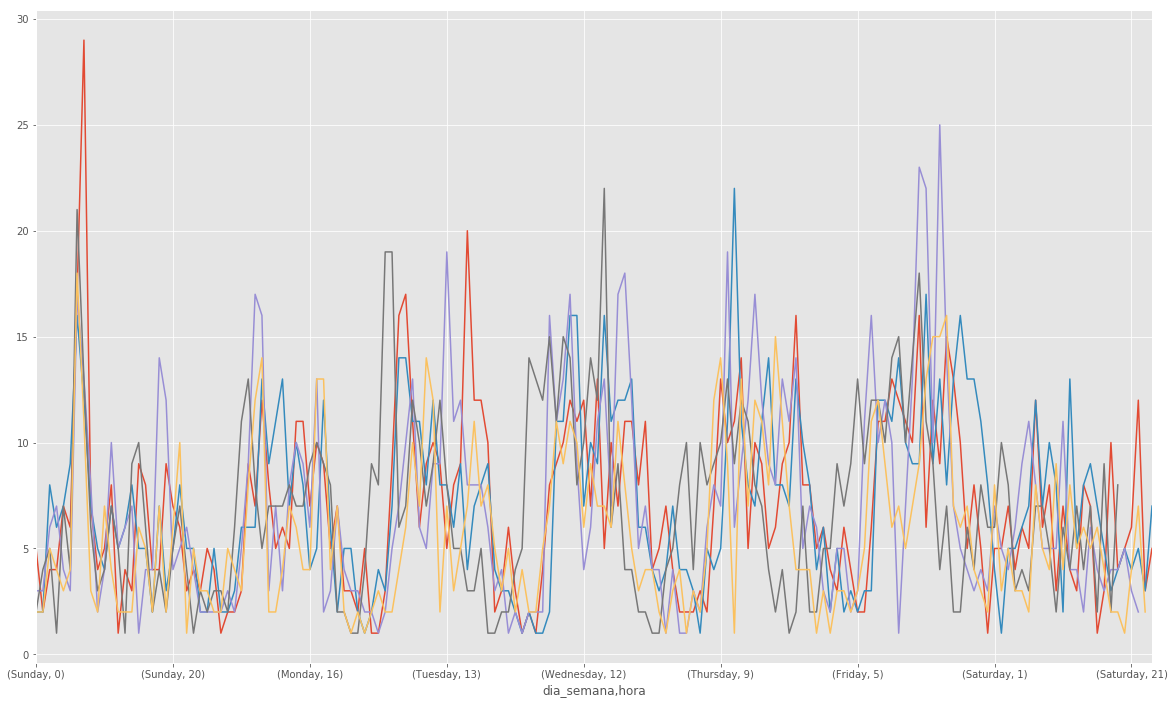

In [0]:
df[df.fecha_hora.dt.year == 2014].groupby(['dia_semana', 'hora']).fecha_hora.agg('count').plot(figsize=(20,12))
df[df.fecha_hora.dt.year == 2015].groupby(['dia_semana', 'hora']).fecha_hora.agg('count').plot(figsize=(20,12))
df[df.fecha_hora.dt.year == 2016].groupby(['dia_semana', 'hora']).fecha_hora.agg('count').plot(figsize=(20,12))
df[df.fecha_hora.dt.year == 2017].groupby(['dia_semana', 'hora']).fecha_hora.agg('count').plot(figsize=(20,12))
df[df.fecha_hora.dt.year == 2018].groupby(['dia_semana', 'hora']).fecha_hora.agg('count').plot(figsize=(20,12))
#df[df.fecha_hora.dt.year == 2019].groupby(['dia_semana', 'hora']).fecha_hora.agg('count').plot(figsize=(20,12))
#df.iloc[].groupby([df.fecha_hora.dt.year, 'dia_semana', 'hora']).lesionados.agg('sum').plot(figsize=(20,12))


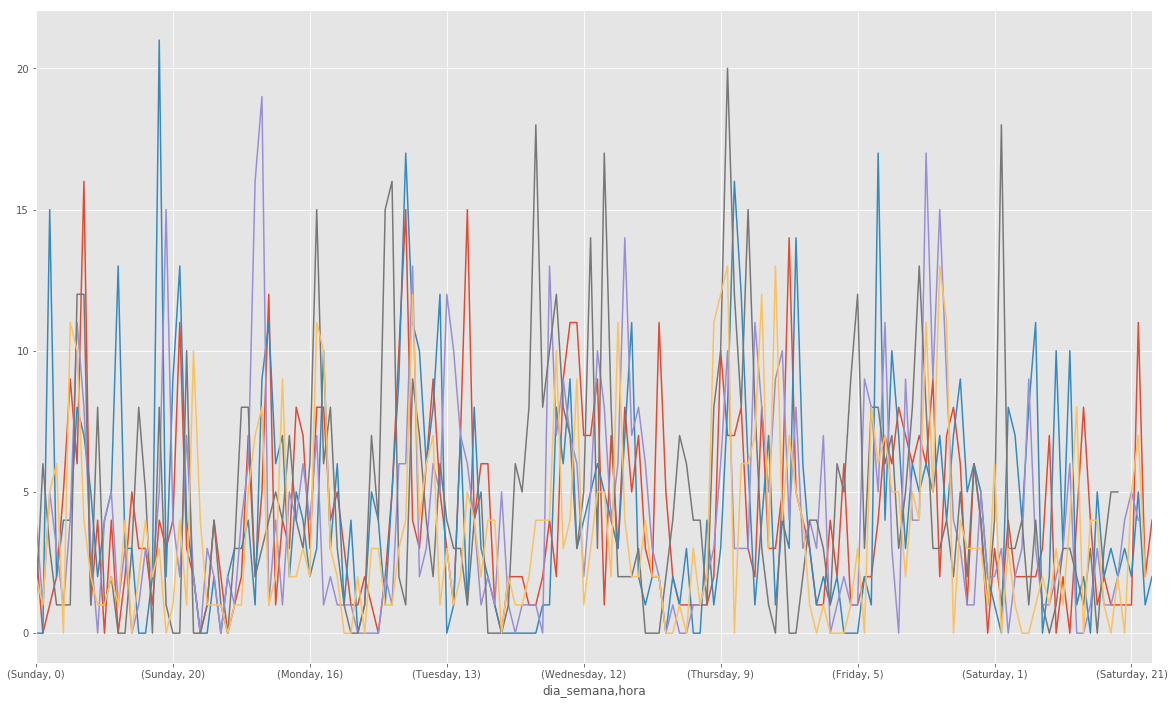

In [0]:
df[df.fecha_hora.dt.year == 2014].groupby(['dia_semana', 'hora']).lesionados.agg('sum').plot(figsize=(20,12))
df[df.fecha_hora.dt.year == 2015].groupby(['dia_semana', 'hora']).lesionados.agg('sum').plot(figsize=(20,12))
df[df.fecha_hora.dt.year == 2016].groupby(['dia_semana', 'hora']).lesionados.agg('sum').plot(figsize=(20,12))
df[df.fecha_hora.dt.year == 2017].groupby(['dia_semana', 'hora']).lesionados.agg('sum').plot(figsize=(20,12))
df[df.fecha_hora.dt.year == 2018].groupby(['dia_semana', 'hora']).lesionados.agg('sum').plot(figsize=(20,12))
#df[df.fecha_hora.dt.year == 2019].groupby(['dia_semana', 'hora']).fecha_hora.agg('count').plot(figsize=(20,12))
#df.iloc[].groupby([df.fecha_hora.dt.year, 'dia_semana', 'hora']).lesionados.agg('sum').plot(figsize=(20,12))


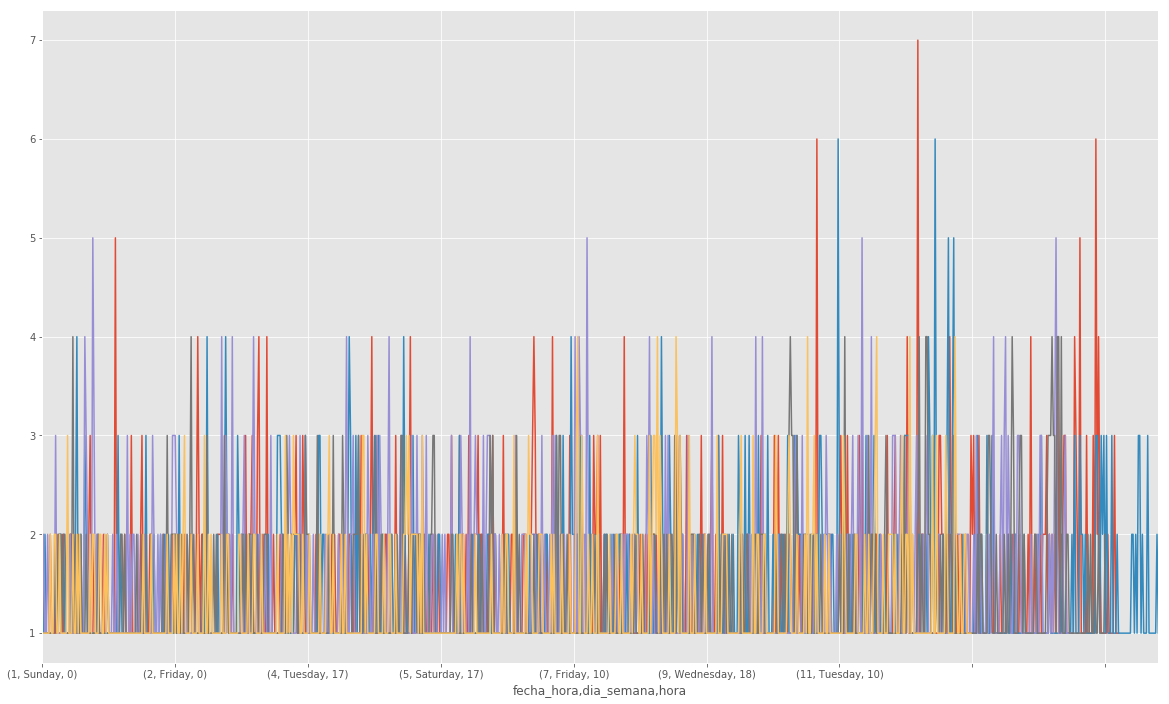

In [0]:
df[df.fecha_hora.dt.year == 2014].groupby([df.fecha_hora.dt.month, 'dia_semana', 'hora']).fecha_hora.agg('count').plot(figsize=(20,12))
df[df.fecha_hora.dt.year == 2015].groupby([df.fecha_hora.dt.month, 'dia_semana', 'hora']).fecha_hora.agg('count').plot(figsize=(20,12))
df[df.fecha_hora.dt.year == 2016].groupby([df.fecha_hora.dt.month, 'dia_semana', 'hora']).fecha_hora.agg('count').plot(figsize=(20,12))
df[df.fecha_hora.dt.year == 2017].groupby([df.fecha_hora.dt.month, 'dia_semana', 'hora']).fecha_hora.agg('count').plot(figsize=(20,12))
df[df.fecha_hora.dt.year == 2018].groupby([df.fecha_hora.dt.month, 'dia_semana', 'hora']).fecha_hora.agg('count').plot(figsize=(20,12))
#df[df.fecha_hora.dt.year == 2019].groupby(['dia_semana', 'hora']).fecha_hora.agg('count').plot(figsize=(20,12))
#df.iloc[].groupby([df.fecha_hora.dt.year, 'dia_semana', 'hora']).lesionados.agg('sum').plot(figsize=(20,12))


IndexError: ignored

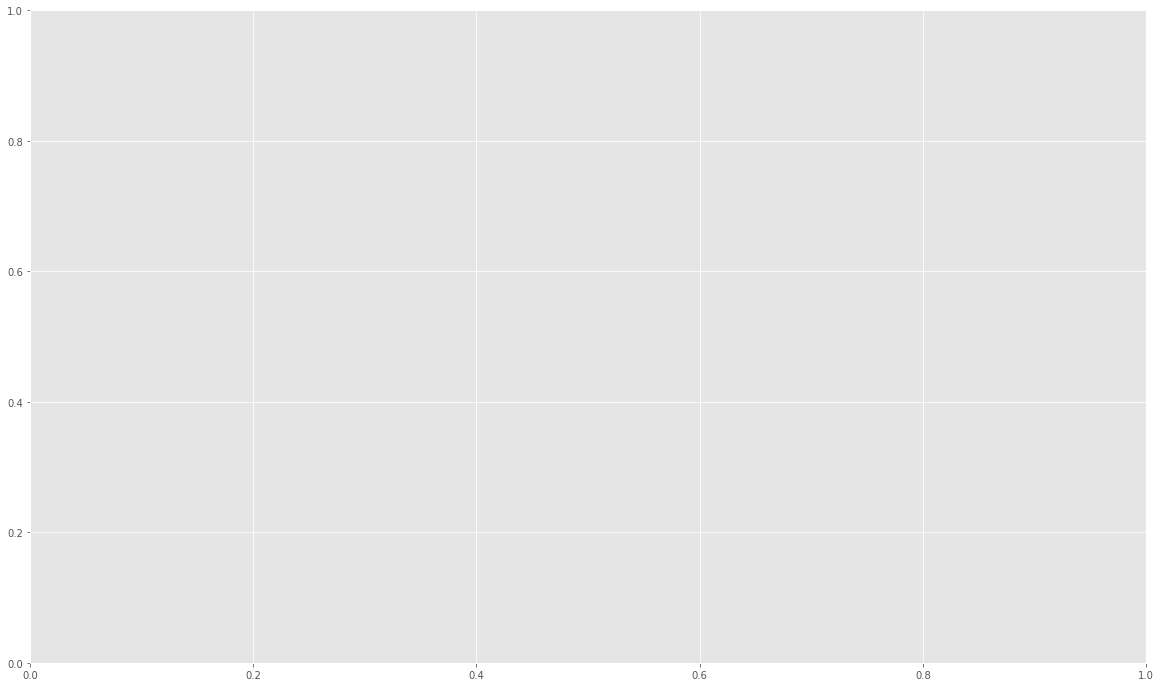

In [0]:
fig, ax = plt.subplots(figsize=(20,12))
sns.pointplot(x=df.fecha_hora, y=df.lesionados.mean(), groupby=['dia_semana', 'hora'], hue=df.fecha_hora.dt.year, ax=ax)

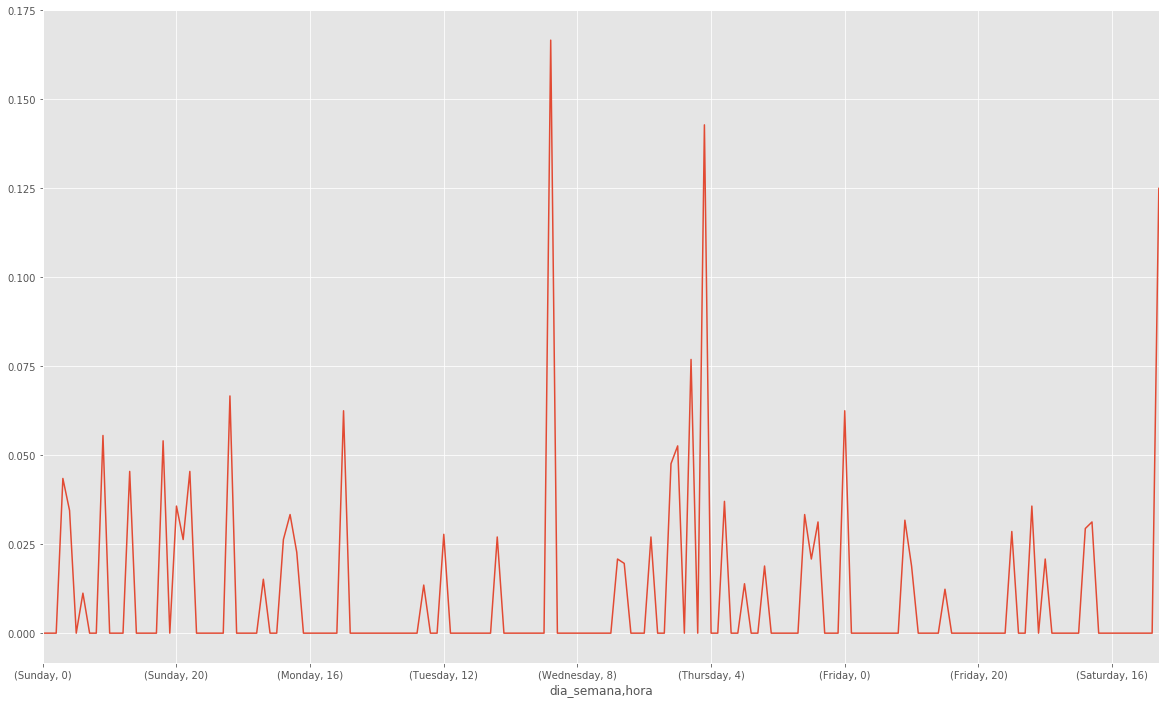

In [0]:
df.groupby(['dia_semana', 'hora']).fallecidos.agg('mean').plot()

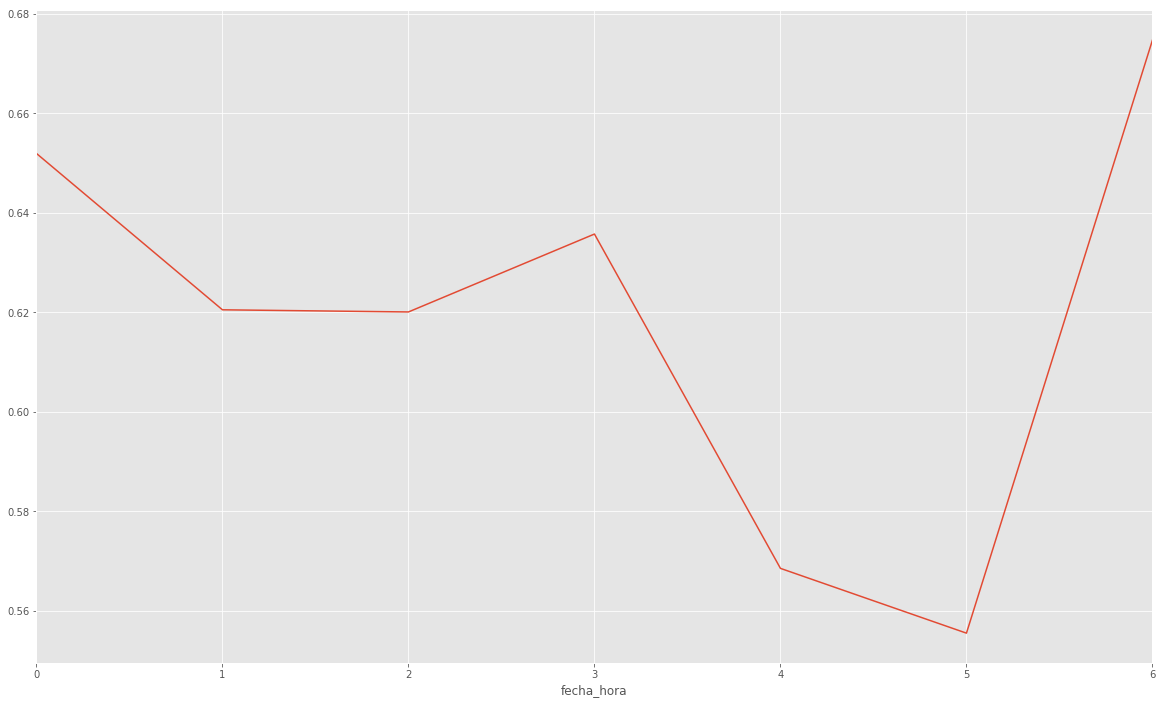

In [0]:
df.groupby(df.fecha_hora.dt.dayofweek).lesionados.mean().plot()

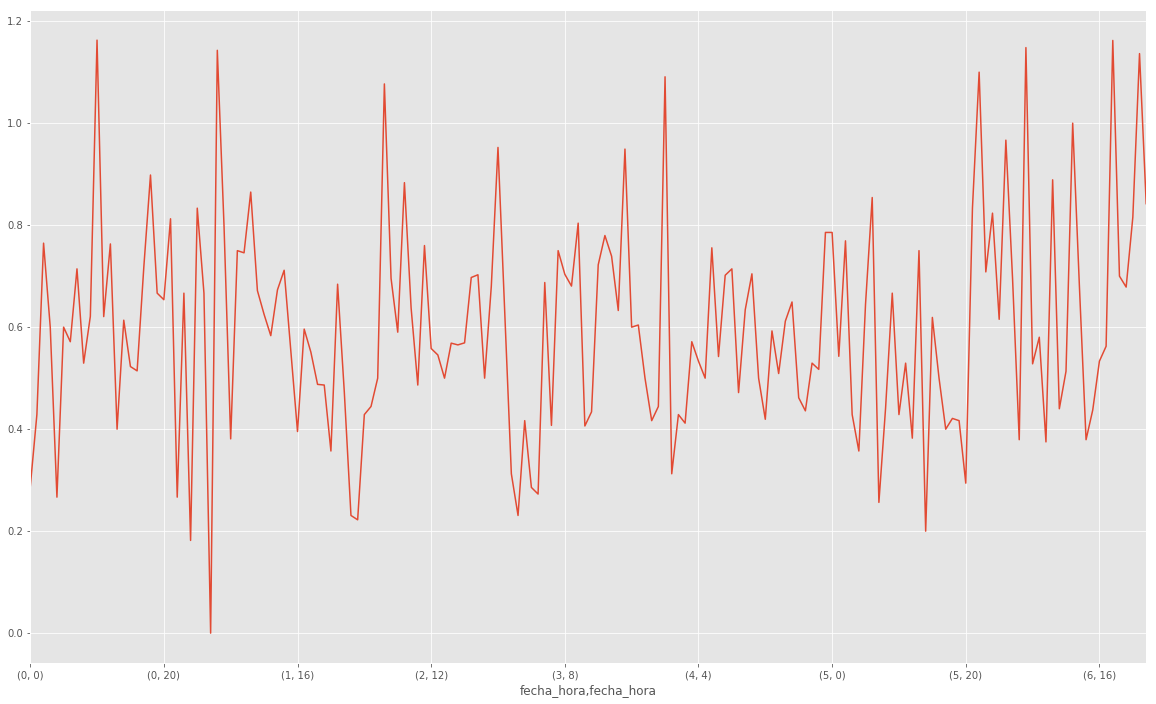

In [0]:
df.groupby([df.fecha_hora.dt.dayofweek, df.fecha_hora.dt.hour]).lesionados.mean().plot()

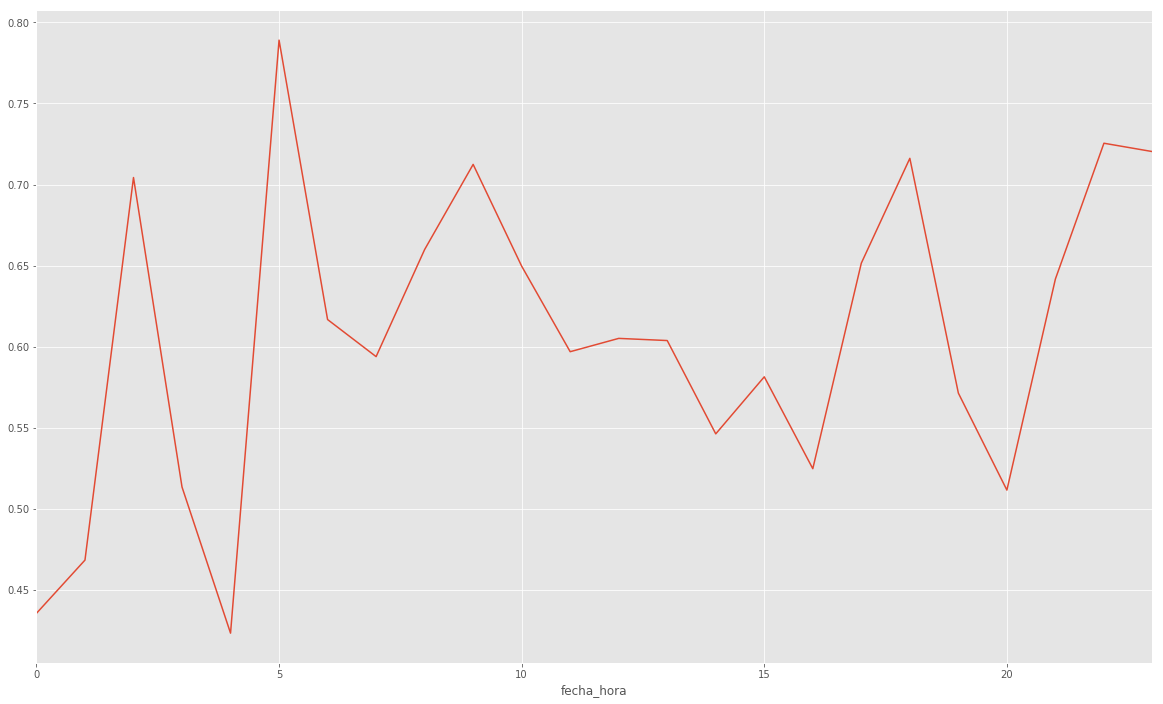

In [0]:
df.groupby(df.fecha_hora.dt.hour).lesionados.mean().plot()